In [142]:
from line import *
from point import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Projective Geometry and Transformations of 2D
Source: Multiple View Geometry, chapter 2

The goal of this project is to understand and implement 2D geometry primitives that are useful to develop algorithms and methods. 

## Planar Geometry
### The 2D projective plane
A point in the plane may be naïvely represented in *inhomogeneous* notation as a 2D vector $(x, y)$. 

#### Points and lines
A line in the plane may be represented by the equation $ax + by + c = 0$, which leads to the vector representation $(a, b, c)^T$. For any non-zero $k$,  $(a, b, c)^T$ and  $k(a, b, c)^T$ represent the same line, this equivalence class is the *homogeneous* representation.

A similar reasoning applies to points. In order to use them with homogeneous lines, we can extend them with a coordinate set to 1. Thus the homogeneous point $(x, y, z)$ can be used to represent the inhomogeneous point $(\frac{x}{z}, \frac{y}{z})$.



In [ ]:
# Explore the duality principle
# How exactly looks like the dual of a given point ? Does it go through the origin ? Is it the ray ?

a: 1, b: 2, c: 0 x: 1, y: 0, z: 1


/tmp/ipykernel_364966/890754525.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


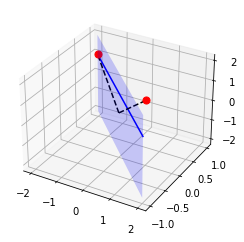

In [193]:
l = Line([1, 2, 0])
p = HomogeneousPoint([1, 0])
p2 = HomogeneousPoint([-2, 1])
print(l, p)

%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, projection = "3d")
l.plot(ax1, color = "b")
p.plot(ax1)
p2.plot(ax1)
fig.show()


#### Projective space
In general, the set of equivalence classes of vectors $\mathbb{R}^{*3}$ forms the projective space $\mathbb{P}^2$. 

#### Basic operations
##### Appartenance of a point to a line
The point $x$ lies on the line $l$ if and only if $x^Tl=0$ (ie [inner product](https://en.wikipedia.org/wiki/Inner_product_space) = scalar product = dot product in Euclidian vector spaces).

In [194]:
print((p in l))
print((p2 in l))

False
True


#### Intersection of lines
Let $l$ and $l'$ bet two lines written as vectors. According to the [triple product](https://en.wikipedia.org/wiki/Triple_product) identity, $l \cdot (l \times l') = l' \cdot (l \times l') = 0$. We see that the point $x = l \times l'$ lies on both lines, so it is their intersection.

In [196]:
l = Line([-1, 0, 1])
l_p = Line([0, -1, 1])
x = l.intersection(l_p)
x

x: 1, y: 1, z: 1

#### Line joining points
By duality, the line joining two points is $l = x \times x'$.

In [197]:
p = HomogeneousPoint([0, 0])
p2 = HomogeneousPoint([1, 0])
l = p.join(p2)
l

a: 0, b: 1, c: 0

##### Ideal points and the line at infinity
For two parallel lines defined by $(a, b, c)$ and $(a', b', c)$, their intersection is $(c' -c)(b, -a, 0)$. This point has no inhomogeneous representation, as it represents a point at infinity, also called an ideal point.
The set of such points in $\mathbb{P}^2$ is defined as $\{(x_1, x_2, 0)\}$, for every ratio $x_1:x_2$. Therefore we see that they only have one parameter, and all of the ideal points lie on the same line, the line at infinity $l_{\infty} = (0, 0, 1)$.

In [62]:
Line([-1, 0, 1]).intersection(Line([-1, 0, 2]))

x: 0, y: 1, z: 0

As seen, the line $l = (a, b, c)$ intersects $l_{\infty}$ at the ideal point $(b, -a, 0)$. In inhomogeneous coordinates, $(-b, a)$ is a vector tangent to the line, and orthogonal to the line normal $(a, b)$. Therefore it represents the line's direction, and we can see the line at infinity as the set of directions of lines in the plane.

/tmp/ipykernel_364966/1630507140.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


x: 1, y: -1, z: 0 x: 2, y: -2, z: 0


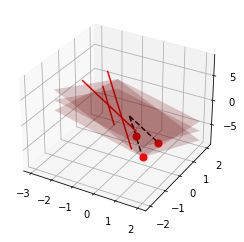

In [199]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, projection = "3d")
l1 = Line([1, 1, 1])
p1 = l1.ideal_point()
l1.plot(ax1)
p1.plot(ax1)

l2 = Line([2, 2, 1])
p2 = l2.ideal_point()
l2.plot(ax1)
p2.plot(ax1)

l3 = Line([1, 2, 1])
p3 = l3.ideal_point()
l3.plot(ax1)
p3.plot(ax1)

fig.show()

print(p1, p2)

In [21]:
from matplotlib import transforms as T
from skspatial.plotting import plot_3d
%matplotlib notebook

In [200]:
smiley = [
    [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
    [0,0,0,1,1,0,0,0,0,0,1,1,0,0,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,1,0],
    [1,0,0,0,1,1,0,0,0,1,1,0,0,0,1],
    [1,0,0,0,1,1,0,0,0,1,1,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [0,1,0,0,0,1,0,0,0,1,0,0,0,1,0],
    [0,1,0,0,0,0,1,1,1,0,0,0,0,1,0],
    [0,0,1,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,1,1,0,0,0,0,0,1,1,0,0,0],
    [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0]
][::-1]
pixels = []
for y in range(15):
    for x in range(15):
        if smiley[y][x]:
            pixels.append([x,y])

/tmp/ipykernel_364966/3255478468.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


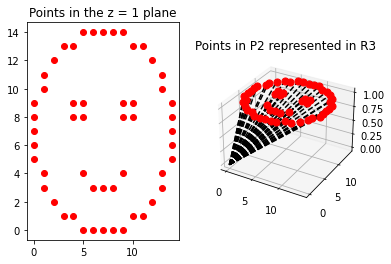

In [201]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
for p in pixels:
    p2 = InhomogeneousPoint(p)
    p2.plot(ax1)
ax1.set_title("Points in the z = 1 plane")
ax2 = fig.add_subplot(1, 2, 2, projection = "3d")
for p in pixels:
    p2 = HomogeneousPoint(p)
    p2.plot(ax2)
ax2.set_title("Points in P2 represented in P2")
fig.show()

TODO
cross product
exterior product
triple scalar product
inner product
dot product